# **Cats Vs Dogs Classification using Convolution Neural Network by Sakshi Srivastava**

**Problem Statement:**

The task at hand involves classifying images of cats and dogs using a Convolutional Neural Network (CNN).

We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

Objectives:

Data Preparation:

● Download and extract the cats vs. dogs dataset.

● Organize the dataset into a structured directory format suitable for TensorFlow’s ImageDataGenerator.

● Split the dataset into training and testing sets.

Data Augmentation and Preprocessing:

● Implement data augmentation techniques to increase the diversity of the training dataset, aiding in the model's ability to generalize.

● Normalize the pixel values of the images for optimal model performance. Model Building:

● Construct a Convolutional Neural Network using TensorFlow and Keras.

● The model should contain multiple convolutional layers, pooling layers, and fully connected layers.

Training:

● Compile the model and train it on the prepared dataset.

● Utilize categorical cross entropy as the loss function and stochastic gradient descent as the optimizer.

● Train the model for a sufficient number of epochs to achieve good performance.

Evaluation:

● Evaluate the model's performance on the validation set during training to monitor for overfitting.

● After training, assess the model's accuracy and make predictions on the test set.

Prediction:

● Implement a system to make predictions on new images, categorizing them as either cat or dog

The system should be able to take an image (or a batch of images), preprocess it, and pass it through the model for predictions.

**LOADING DATASET FROM KAGGLE**

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakshi1922","key":"23c2bf92bbe378ee4a7a7445ed404ada"}'}

In [2]:
!mkdir -p ~/.kaggle          # Create hidden kaggle folder
!cp kaggle.json ~/.kaggle/   # Move your json file
!chmod 600 ~/.kaggle/kaggle.json  # Secure it


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:08<00:00, 396MB/s]
100% 1.06G/1.06G [00:08<00:00, 131MB/s]


**Loading Files from Zip**

In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

**IMPORTING LIBRARIES**

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

**Visualization of training and testing directory**

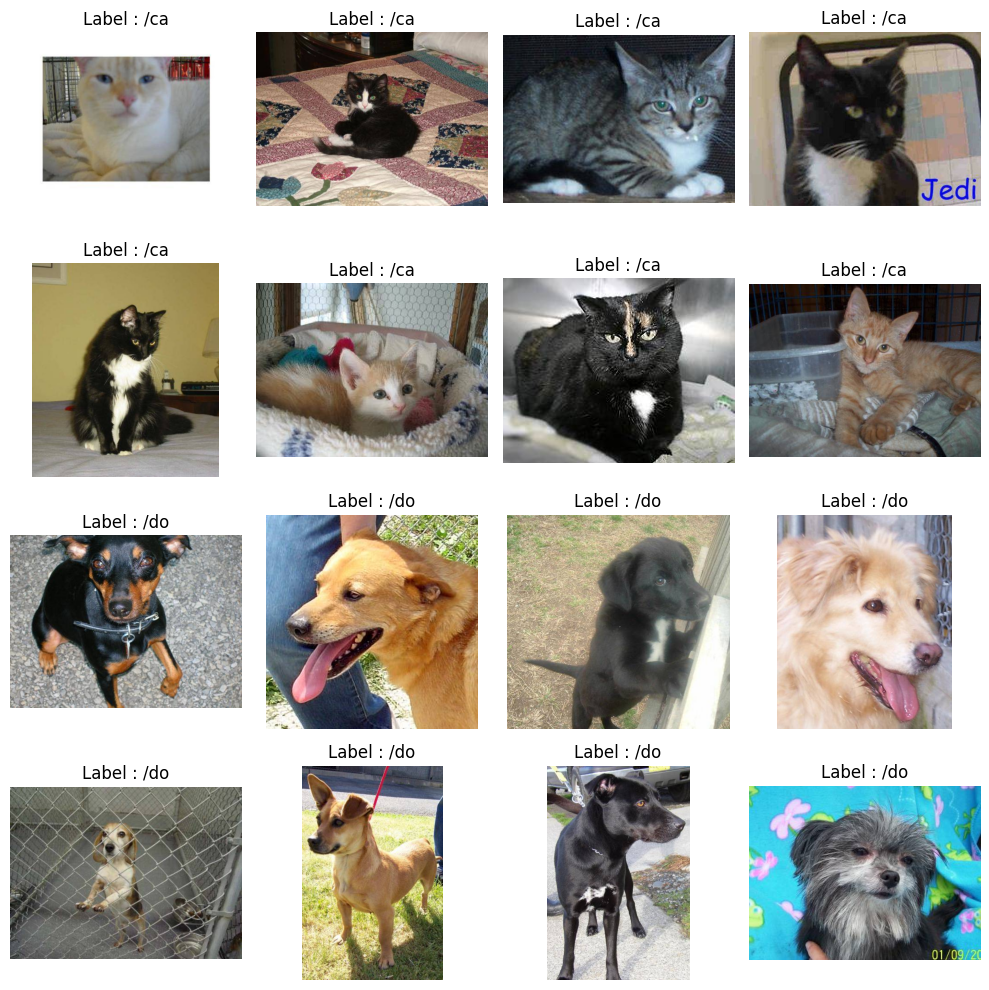

In [6]:
fig = plt.gcf()
fig.set_size_inches(10,10)

cat_dir = os.path.join('/content/train/cats')
dog_dir = os.path.join('/content/train/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210
cat_images = [os.path.join(cat_dir,fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir,fname) for fname in dog_names[pic_index-8:pic_index]]

for i,img_path in enumerate(cat_images + dog_images):
     sp = plt.subplot(4,4,i+1)
     sp.axis('off')
     img = mpimg.imread(img_path)
     plt.imshow(img)
     plt.title(f"Label : {img_path[19:22]}")

plt.tight_layout()
plt.show()

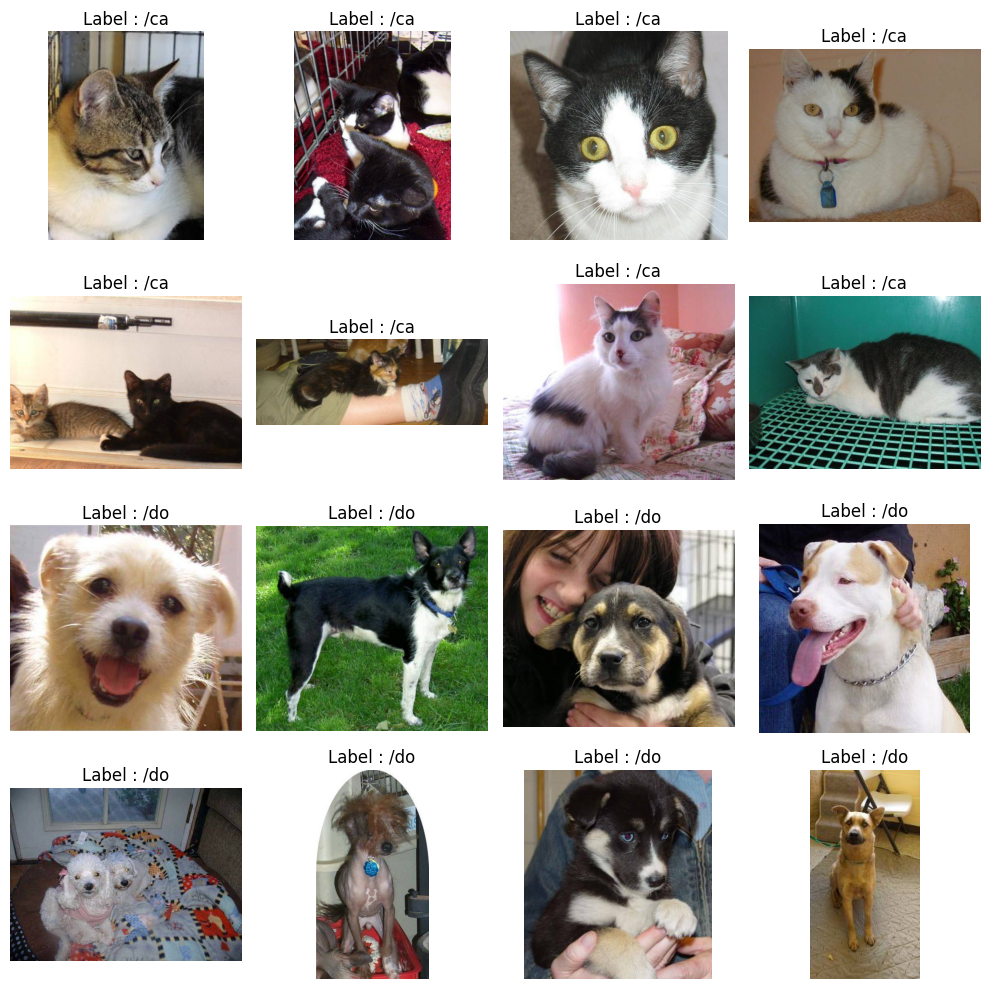

In [7]:
#Visualization of test_directory
fig = plt.gcf()
fig.set_size_inches(10,10)

cat_dir = os.path.join('/content/test/cats')
dog_dir = os.path.join('/content/test/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210
cat_images = [os.path.join(cat_dir,fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir,fname) for fname in dog_names[pic_index-8:pic_index]]

for i,img_path in enumerate(cat_images + dog_images):
     sp = plt.subplot(4,4,i+1)
     sp.axis('off')
     img = mpimg.imread(img_path)
     plt.imshow(img)
     plt.title(f"Label : {img_path[18:21]}")

plt.tight_layout()
plt.show()

In [8]:
#generators-batches made from the dataset
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",  #cat 0 dog 1 will be assigned
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256), #same size
)

Found 20000 files belonging to 2 classes.


In [9]:
#generators-batches made from the dataset
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",  #cat 0 dog 1 will be assigned
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256), #same size
)

Found 5000 files belonging to 2 classes.


images are stores as numpy array,every value is from 0to 255 so we need to normalize it from 0 to 1(pixel)

In [10]:
#Normalize
def normalise(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(normalise)
validation_ds=validation_ds.map(normalise)

**MODEL BUILDING**

In [11]:
#CNN
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

**COMPILING MODEL**

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 73ms/step - accuracy: 0.6193 - loss: 0.6781 - val_accuracy: 0.7350 - val_loss: 0.5248
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7484 - loss: 0.5106 - val_accuracy: 0.7776 - val_loss: 0.4735
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8092 - loss: 0.4097 - val_accuracy: 0.7918 - val_loss: 0.5276
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8710 - loss: 0.2970 - val_accuracy: 0.7772 - val_loss: 0.5990
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9247 - loss: 0.1770 - val_accuracy: 0.7864 - val_loss: 0.7676
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9529 - loss: 0.1173 - val_accuracy: 0.7476 - val_loss: 0.9711
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9668 - loss: 0.0951 - val_accuracy: 0.7284 - val_loss: 1.1104
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9805 - loss: 0.0586 - 

In [ ]:
# Evalaute the model

loss, acc = model.evaluate(train_ds)
print(f"\nAccuracy of train: {acc:.4f}\n")

losst, acct = model.evaluate(validation_ds)
print(f"\nAccuracy of test : {acct:.4f}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

epoch increasing, training accuracy is improving but validation  accuracy is almost 75 to 80%

the gap between training accuracy and validation  accuracy is representing overfitting

In [ ]:
plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show()

epoch increasing,training loss decreasing whereas validation loss is increasing,hence gap increasing which leads to overfittng...
to avoid overfitting
* add more data
* data augmentation
* dropout
* l1/l2 regularisation
* batch norm




**MODEL WITH IMPROVEMENT**

In [ ]:
#CNN + batch normalization and dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [ ]:
#Saving model
model.save('cats_vs_dogs_cnn_model.keras')

In [23]:
# Evaluvate
loss,acc = model.evaluate(train_ds, batch_size = 32, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

The accuracy of the model for training data is: 92.14000105857849
The Loss of the model for training data is: 0.20517101883888245


In [ ]:
# Evaluvate
loss,acc = model.evaluate(validation_ds, batch_size = 32, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

In [ ]:
# Evalaute the model

loss, acc = model.evaluate(train_ds)
print(f"\nAccuracy of Train: {acc:.4f}\n")

losst, acct = model.evaluate(validation_ds)
print(f"\nAccuracy of validation : {acct:.4f}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show()

**PREDICTION**

In [ ]:
import cv2


In [ ]:
test_img=cv2.imread('/content/test/dogs/dog.100.jpg')

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img=cv2.resize(test_img,(256,256))

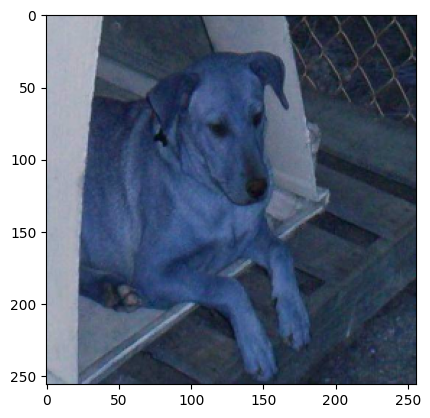

In [33]:
plt.imshow(test_img)

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

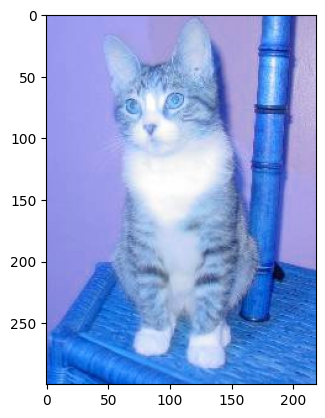

In [36]:
import cv2
test_img=cv2.imread('/content/test/cats/cat.10007.jpg')
plt.imshow(test_img)

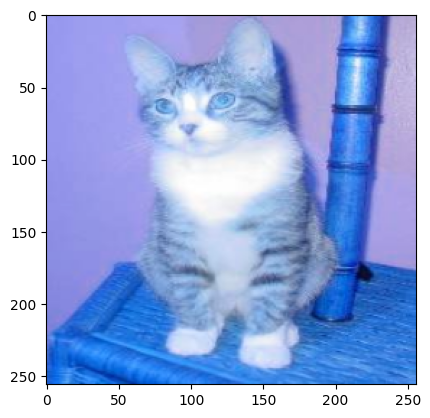

In [37]:
test_img=cv2.resize(test_img,(256,256))
plt.imshow(test_img)


In [38]:
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.]], dtype=float32)